In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats, get_interpro_annotations

Same notebook, but with automatic outlier removal to see impact on training scores.

## Parameters

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 100)

In [3]:
ORGANISMS = [3702]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "sugar transmembrane transporter activity",
    "amino acid transmembrane transporter activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_at_sugaramino_outlier_removal"
# TODO pathlib
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = False  # If false, use cached results, e.g. to create more plots

## Full dataset

In [4]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset(
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 1773 sequences into 646 clusters at threshold 50
cd-hit: clustered 1773 sequences into 923 clusters at threshold 70
cd-hit: clustered 1773 sequences into 1203 clusters at threshold 90
cd-hit: clustered 1773 sequences into 1554 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              100                      3   
                                                                          None                     3   
                                               transcript_level           50                       3   
                                                                          70                       4   
                                                                          90                       7   
                                                                          100                     37   
                                                                          None                    49   
                   True          computational protein_level              50                      87   
                                                                          70                     114   
                                                                          90                     153   
                                                                          100                    329   
                                                                          None                   433   
                                               transcript_level           50                       7   
                                                                          70                      13   
                                                                          90                      19   
                                                                          100                     84   
                                                                          None                   164   
                                 experiment    protein_level              50                      25   
                                                                          70                      33   
                                                                          90                      38   
                                                                          100                     41   
                                                                          None                    42   
                                               transcript_level           50                       3   
                                                                          70                       5   
                                                                          90                       5   
                                                                          100                      6   
                                                                          None                     6   
True               True          computational protein_level              50                     206   
                                                                          70                     287   
                                                                          90                     370   
                                                                          100                    408   
                                                                          None                   418   
                                               transcript_level           50                     208   
                                                                          70                     338   
                                                                          90                     462   
                                                                          100                    492   
                                                                          None                   504   
                              

## Filtered Subset

In [5]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 420 sequences into 276 clusters at threshold 50
cd-hit: clustered 420 sequences into 344 clusters at threshold 70
cd-hit: clustered 420 sequences into 403 clusters at threshold 90
cd-hit: clustered 420 sequences into 419 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     276   
                                                                        70                     344   
                                                                        90                     403   
                                                                        100                    419   
                                                                        None                   420   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              264  
                                                                        70              281  
                                                                        90              288  
                                                                        100             288  
                                                                        None            288

## Sugar/Amino subset

In [6]:
from subpred.dataset_filters import get_classification_subset

dataset_organism = get_classification_subset(
    dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES
)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

In [7]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
amino acid transmembrane transporter activity    33
sugar transmembrane transporter activity         32
Name: count, dtype: int64

Clustering at 70%

In [8]:
from subpred.dataset_filters import cluster_sequences

dataset_organism = cluster_sequences(
    dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD
)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 65 sequences into 54 clusters at threshold 70


go_term_ancestor
sugar transmembrane transporter activity         28
amino acid transmembrane transporter activity    26
Name: count, dtype: int64

### Interpro annotations

In [9]:
from subpred.protein_go_datasets import count_interpro_annotations, get_interpro_table

count_interpro_annotations(dataset_organism[1], GO_TERMS_CLASSES)

######## sugar transmembrane transporter activity ########
Family
Sugar transporter SWEET                                      13
Sugar/inositol transporter                                   12
Major facilitator, sugar transporter-like                    12
Sugar transport protein STP/Polyol transporter PLT, plant     8
Sugar transport protein STP/MST-like, plant                   7
Major Facilitator Superfamily Trehalose Transporter           2
Sugar transporter ERD6/Tret1-like                             2
Major Facilitator Superfamily Sugar Transporter               2
Major facilitator superfamily                                 2
Solute carrier family 17 member 9-like                        1
Major Facilitator Superfamily Sodium/Anion Cotransporter      1
Polyol transporter 1-6                                        1
Triose Phosphate/Phosphate Translocator                       1
Sucrose/H+ symporter, plant                                   1
Name: count, dtype: int64

Domain
Majo

In [10]:
# Some proteins have multiple rows!
get_interpro_table(
    *dataset_organism,
    go_terms=["sugar transmembrane transporter activity"],
    interpro_types=["Family", "Homologous_superfamily"]
)

,Uniprot,go_term_ancestor,protein_names,Family,Homologous_superfamily
0,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,Sugar/inositol transporter,MFS transporter superfamily
1,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,Major Facilitator Superfamily Trehalose Transp...,MFS transporter superfamily
2,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,"Major facilitator, sugar transporter-like",MFS transporter superfamily
3,O04036,sugar transmembrane transporter activity,Sugar transporter ERD6 (Early-responsive to de...,Sugar transporter ERD6/Tret1-like,MFS transporter superfamily
4,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),Sugar transport protein STP/Polyol transporter...,MFS transporter superfamily
5,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),Sugar/inositol transporter,MFS transporter superfamily
6,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),"Sugar transport protein STP/MST-like, plant",MFS transporter superfamily
7,O04249,sugar transmembrane transporter activity,Sugar transport protein 7 (Hexose transporter 7),"Major facilitator, sugar transporter-like",MFS transporter superfamily
8,P23586,sugar transmembrane transporter activity,Sugar transport protein 1 (Glucose transporter...,"Sugar transport protein STP/MST-like, plant",MFS transporter superfamily
9,P23586,sugar transmembrane transporter activity,Sugar transport protein 1 (Glucose transporter...,"Major facilitator, sugar transporter-like",MFS transporter superfamily


In [11]:
# Some proteins have multiple rows!
get_interpro_table(
    *dataset_organism,
    go_terms=["amino acid transmembrane transporter activity"],
    interpro_types=["Family", "Homologous_superfamily", "Domain"]
)

,Uniprot,go_term_ancestor,protein_names,Family,Homologous_superfamily,Domain
0,F4HW02,amino acid transmembrane transporter activity,GABA transporter 1 (AtGAT1) (Bidirectional ami...,NaN,NaN,"Amino acid transporter, transmembrane domain"
1,F4IUW3,amino acid transmembrane transporter activity,Amino acid transporter AVT1C (AtAvt1C),NaN,NaN,"Amino acid transporter, transmembrane domain"
2,O64759,amino acid transmembrane transporter activity,Cationic amino acid transporter 5,Amino acid/polyamine transporter I,NaN,"Cationic amino acid transporter, C-terminal"
3,O81845,amino acid transmembrane transporter activity,Mitochondrial uncoupling protein 1 (AtPUMP1),Mitochondrial carrier protein,Mitochondrial carrier domain superfamily,NaN
4,O81845,amino acid transmembrane transporter activity,Mitochondrial uncoupling protein 1 (AtPUMP1),Mitochondrial Metabolite Transporter,Mitochondrial carrier domain superfamily,NaN
5,P57758,amino acid transmembrane transporter activity,Cystinosin homolog,Lysosomal cystine transporter,NaN,NaN
6,P92961,amino acid transmembrane transporter activity,Proline transporter 1 (AtPROT1),NaN,NaN,"Amino acid transporter, transmembrane domain"
7,Q38967,amino acid transmembrane transporter activity,Amino acid permease 2 (Amino acid transporter ...,NaN,NaN,"Amino acid transporter, transmembrane domain"
8,Q42400,amino acid transmembrane transporter activity,Amino acid permease 1 (Amino acid transporter ...,NaN,NaN,"Amino acid transporter, transmembrane domain"
9,Q84MA5,amino acid transmembrane transporter activity,Cationic amino acid transporter 1 (Amino acid ...,Amino acid/polyamine transporter I,NaN,"Cationic amino acid transporter, C-terminal"


Issue: GO:0004970 is connected directly to GO:0015171, but that does not make sense.



## Feature generation

In [12]:
from subpred.features import get_features

features_list, series_labels = get_features(dataset_full=dataset_organism)

2025-06-02 22:04:46.510401: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-02 22:04:46.516675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748894686.522931  119339 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748894686.525032  119339 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-02 22:04:46.533163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [13]:
from subpred.features import get_ml_datasets

ml_datasets = list(
    get_ml_datasets(features_list=features_list, series_labels=series_labels)
)
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 54, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER

## Outliers

In [14]:
from subpred.evaluation import outlier_check
print(len(ml_datasets))
df_outliers = outlier_check(dataset_full=dataset_organism, ml_datasets=ml_datasets, threshold=0.5)
# df_outliers[df_outliers.outlier_count>df_outliers.outlier_count.quantile(0.95)]
df_outliers

20


,outlier_count,protein_names,go_term_ancestor
Uniprot,,,
Q9ZV24,12,"Outer envelope pore protein 16-1, chloroplasti...",amino acid transmembrane transporter activity
Q9C8E7,10,Glutamate receptor 3.3 (AtGLR3.3) (Glutamate r...,amino acid transmembrane transporter activity
P57758,10,Cystinosin homolog,amino acid transmembrane transporter activity


#### Automatic outlier removal

In [15]:
# they were found with the outliers_check function below
potential_outliers = df_outliers.index.tolist()
dataset_organism = (
    dataset_organism[0][~(dataset_organism[0].index.isin(potential_outliers))],
    dataset_organism[1][~(dataset_organism[1].index.isin(potential_outliers))],
)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
sugar transmembrane transporter activity         28
amino acid transmembrane transporter activity    23
Name: count, dtype: int64

In [16]:
features_list, series_labels = get_features(dataset_full=dataset_organism)
ml_datasets = list(
    get_ml_datasets(features_list=features_list, series_labels=series_labels)
)
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AAC, Features: 20, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: PAAC, Features: 400, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: AA_KMER3, Features: 8000, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_COMP, Features: 20, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 51, Classes: [0 1], Labels: ['amino acid transmembrane transporter activity'
  'sugar transmembrane transporter activity']),
 Name: 3Di_KMER

### Saving data for DNNs

In [17]:
# saving as pickle, to load in different notebook with different env,
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle

with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", "wb") as handle:
    pickle.dump(ml_datasets, handle)

## Model evaluation SVM

In [18]:
from subpred.evaluation import (
    get_svm_results,
    plot_results_long,
    summarize_results_long,
)
from sklearn.metrics import f1_score, make_scorer

scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Amino Acid": make_scorer(
        f1_score, pos_label=0
    ),  # labels are encoded in lex. order
    "F1 Sugar": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=5,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=scoring_outer,
)
# df_results_long

In [19]:
summarize_results_long(df_results_long=df_results_long)

Mean    Median      Sdev
Feature     Metric                                         
3Di_COMP    Balanced Accuracy  0.933667  1.000000  0.097909
            F1 Amino Acid      0.915062  1.000000  0.139848
            F1 Macro           0.934497  1.000000  0.100733
            F1 Sugar           0.953931  1.000000  0.064793
3Di_KMER2   Balanced Accuracy  0.967000  1.000000  0.045674
            F1 Amino Acid      0.961154  1.000000  0.053699
            F1 Macro           0.964369  1.000000  0.048614
            F1 Sugar           0.967584  1.000000  0.044486
3Di_KMER3   Balanced Accuracy  0.899333  0.900000  0.077874
            F1 Amino Acid      0.890820  0.888889  0.088377
            F1 Macro           0.901271  0.898990  0.077226
            F1 Sugar           0.911723  0.923077  0.073348
AAC         Balanced Accuracy  0.766000  0.750000  0.115893
            F1 Amino Acid      0.731030  0.727273  0.138534
            F1 Macro           0.750468  0.696970  0.125098
            F1 Sugar           0.769906  0.800000  0.146652
AA_KMER3    Balanced Accuracy  0.769667  0.750000  0.133092
            F1 Amino Acid      0.773661  0.769231  0.126050
            F1 Macro           0.750249  0.727273  0.144570
            F1 Sugar           0.726837  0.727273  0.170822
COMB_KMER1  Balanced Accuracy  0.951000  1.000000  0.079797
            F1 Amino Acid      0.944993  1.000000  0.091469
            F1 Macro           0.947838  1.000000  0.087104
            F1 Sugar           0.950684  1.000000  0.085967
COMB_KMER2  Balanced Accuracy  0.937667  1.000000  0.083233
            F1 Amino Acid      0.933720  1.000000  0.086155
            F1 Macro           0.933423  1.000000  0.088376
            F1 Sugar           0.933125  1.000000  0.091852
COMB_KMER3  Balanced Accuracy  0.913667  0.916667  0.088483
            F1 Amino Acid      0.906424  0.909091  0.096576
            F1 Macro           0.911479  0.905983  0.089744
            F1 Sugar           0.916533  0.909091  0.085663
DUMMY       Balanced Accuracy  0.479667  0.500000  0.136084
            F1 Amino Acid      0.354008  0.363636  0.231889
            F1 Macro           0.443847  0.450549  0.140759
            F1 Sugar           0.533685  0.545455  0.156403
META        Balanced Accuracy  0.810333  0.833333  0.153683
            F1 Amino Acid      0.783192  0.800000  0.180659
            F1 Macro           0.797899  0.800000  0.161021
            F1 Sugar           0.812606  0.833333  0.152757
META_STD    Balanced Accuracy  0.869000  0.916667  0.135326
            F1 Amino Acid      0.843515  0.888889  0.176137
            F1 Macro           0.859698  0.898990  0.145663
            F1 Sugar           0.875881  0.909091  0.126307
PAAC        Balanced Accuracy  0.881333  0.900000  0.104701
            F1 Amino Acid      0.864291  0.909091  0.134260
            F1 Macro           0.871463  0.898990  0.111797
            F1 Sugar           0.878634  0.888889  0.095268
PROSTT5_3DI Balanced Accuracy  0.949333  1.000000  0.054852
            F1 Amino Acid      0.942395  1.000000  0.062370
            F1 Macro           0.950654  1.000000  0.052569
            F1 Sugar           0.958912  1.000000  0.044237
PROSTT5_AA  Balanced Accuracy  0.948333  1.000000  0.059755
            F1 Amino Acid      0.941804  1.000000  0.068748
            F1 Macro           0.947879  1.000000  0.059464
            F1 Sugar           0.953955  1.000000  0.051824
PROTT5_AA   Balanced Accuracy  0.921333  0.900000  0.072652
            F1 Amino Acid      0.910072  0.909091  0.092360
            F1 Macro           0.923929  0.898990  0.069034
            F1 Sugar           0.937787  0.923077  0.050825
PSSM_50_1   Balanced Accuracy  0.648667  0.666667  0.189613
            F1 Amino Acid      0.573094  0.666667  0.269418
            F1 Macro           0.626575  0.633333  0.200400
            F1 Sugar           0.680056  0.666667  0.158289
PSSM_50_3   Balanced Accuracy  0.795000  0.816667  0.146645
            F1 

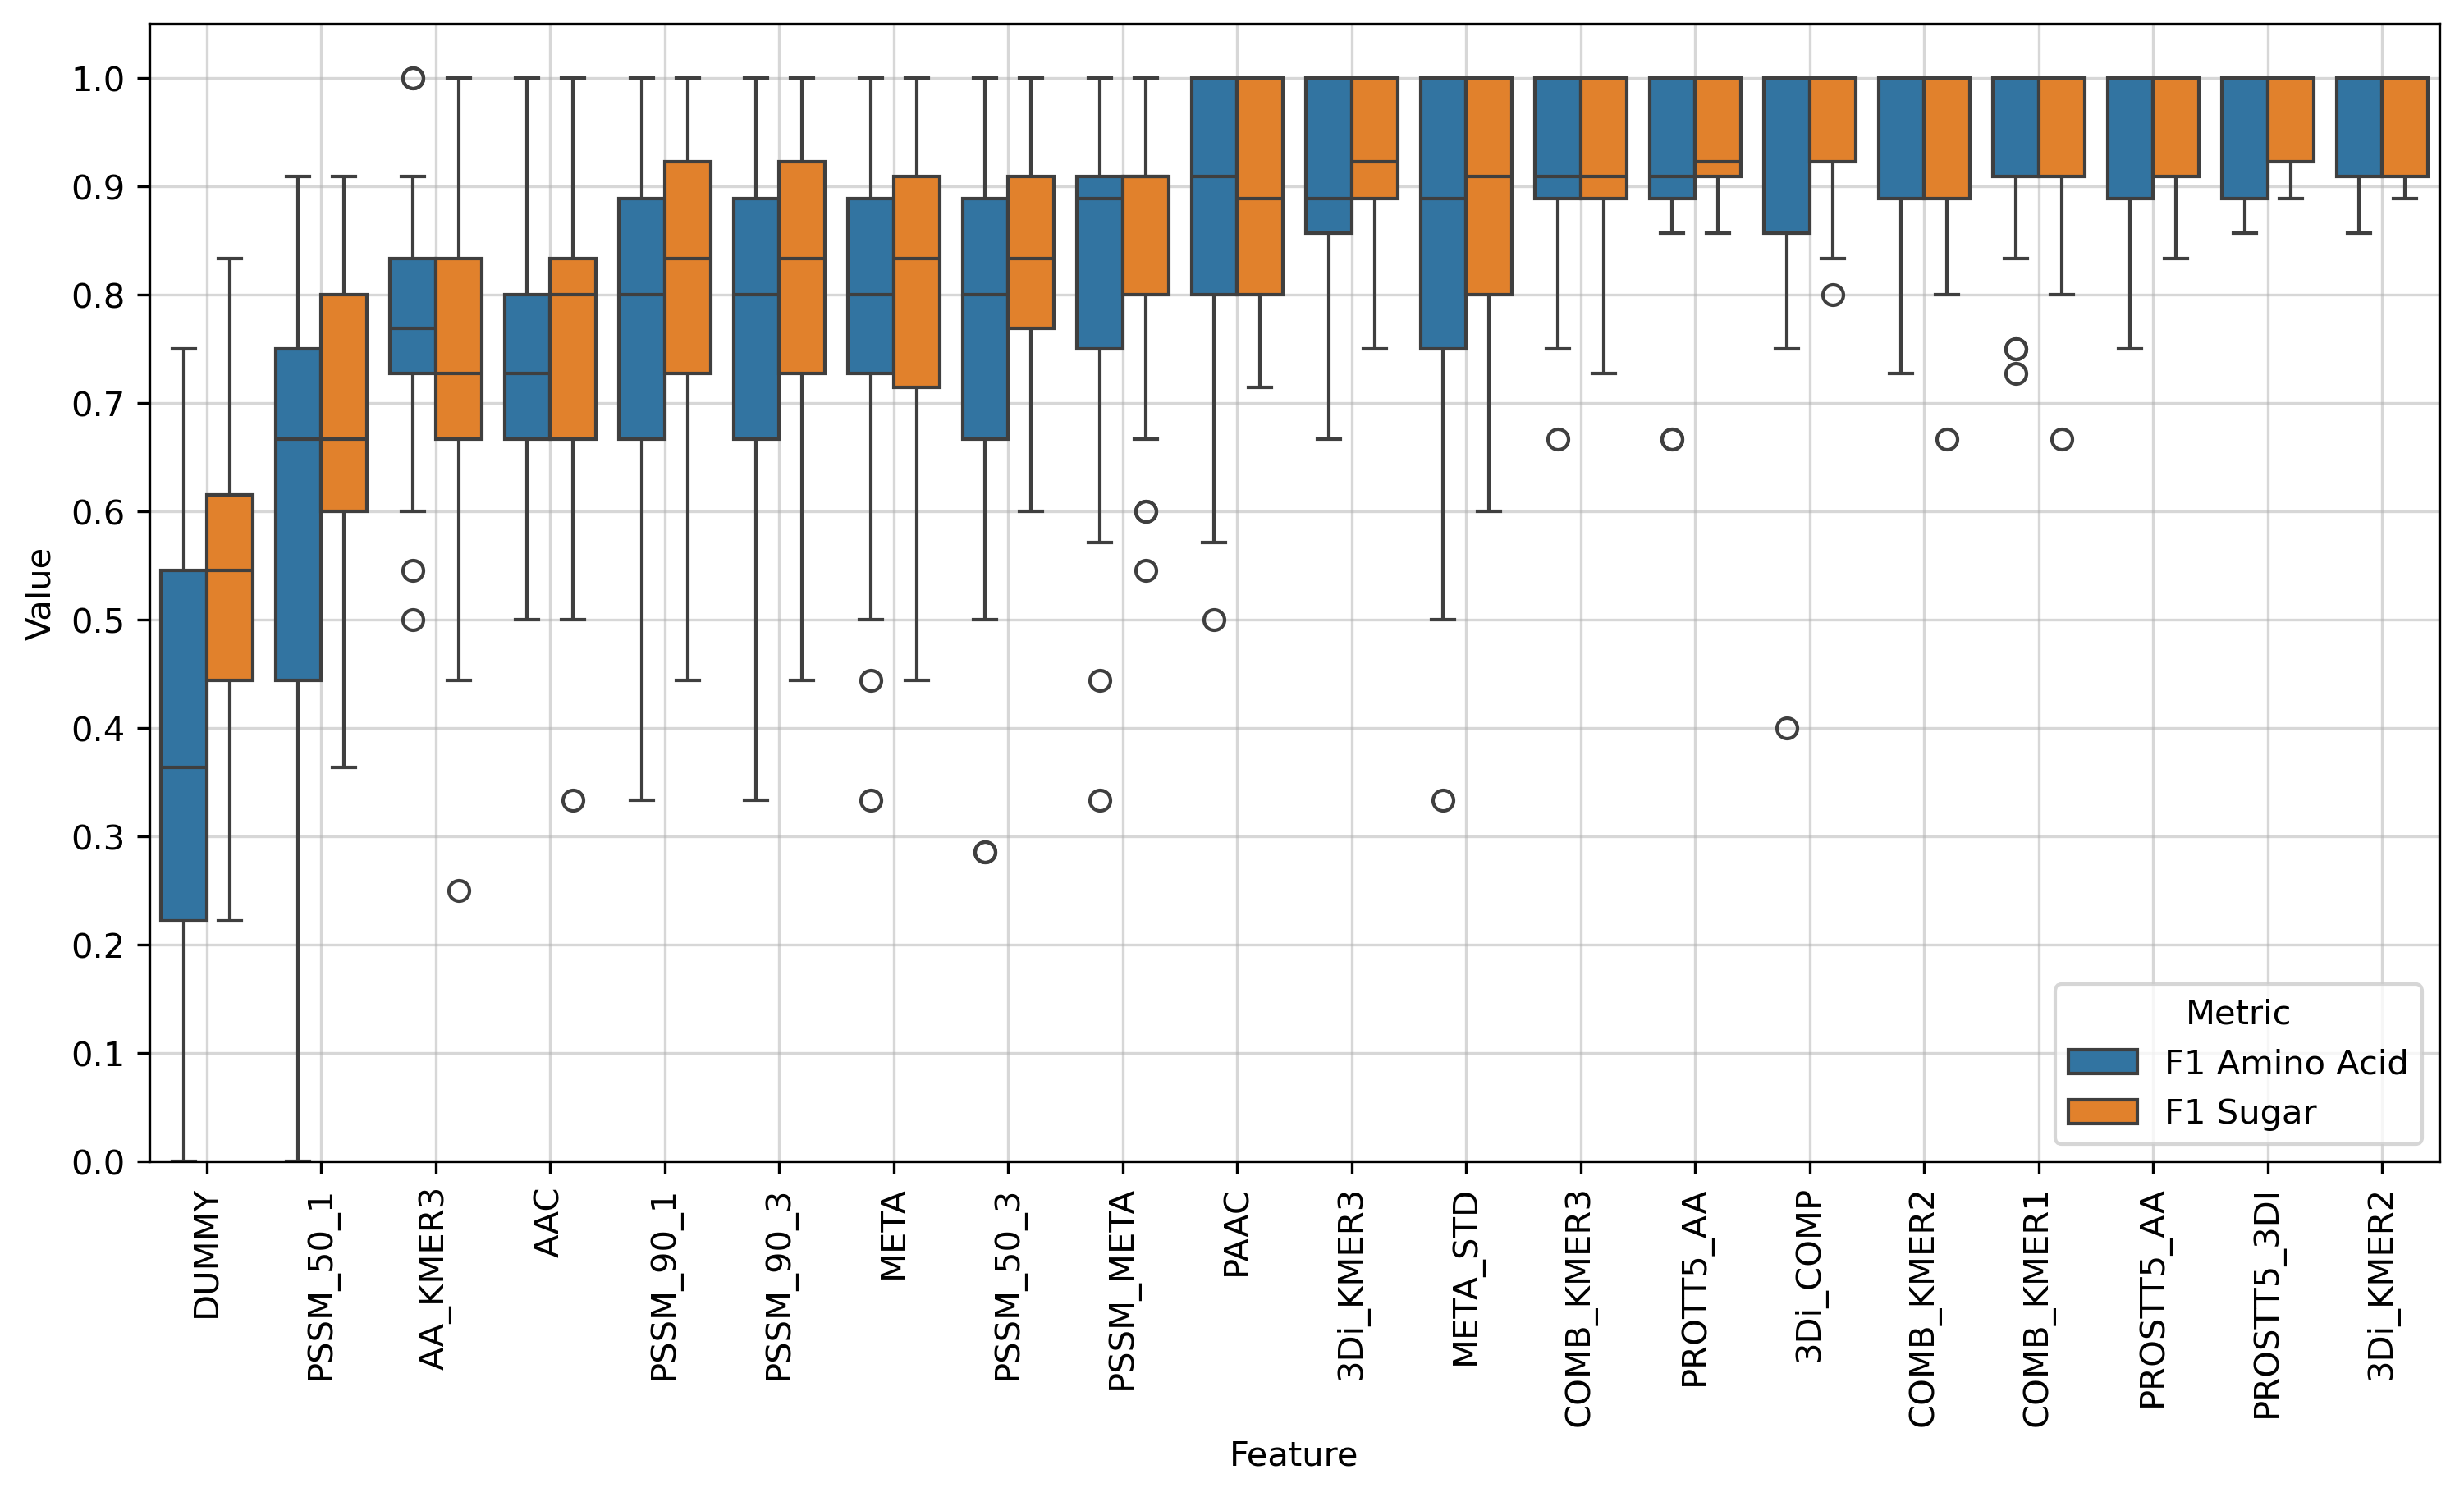

In [20]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include=["F1 Amino Acid", "F1 Sugar"],
    figsize=(12, 6),
)

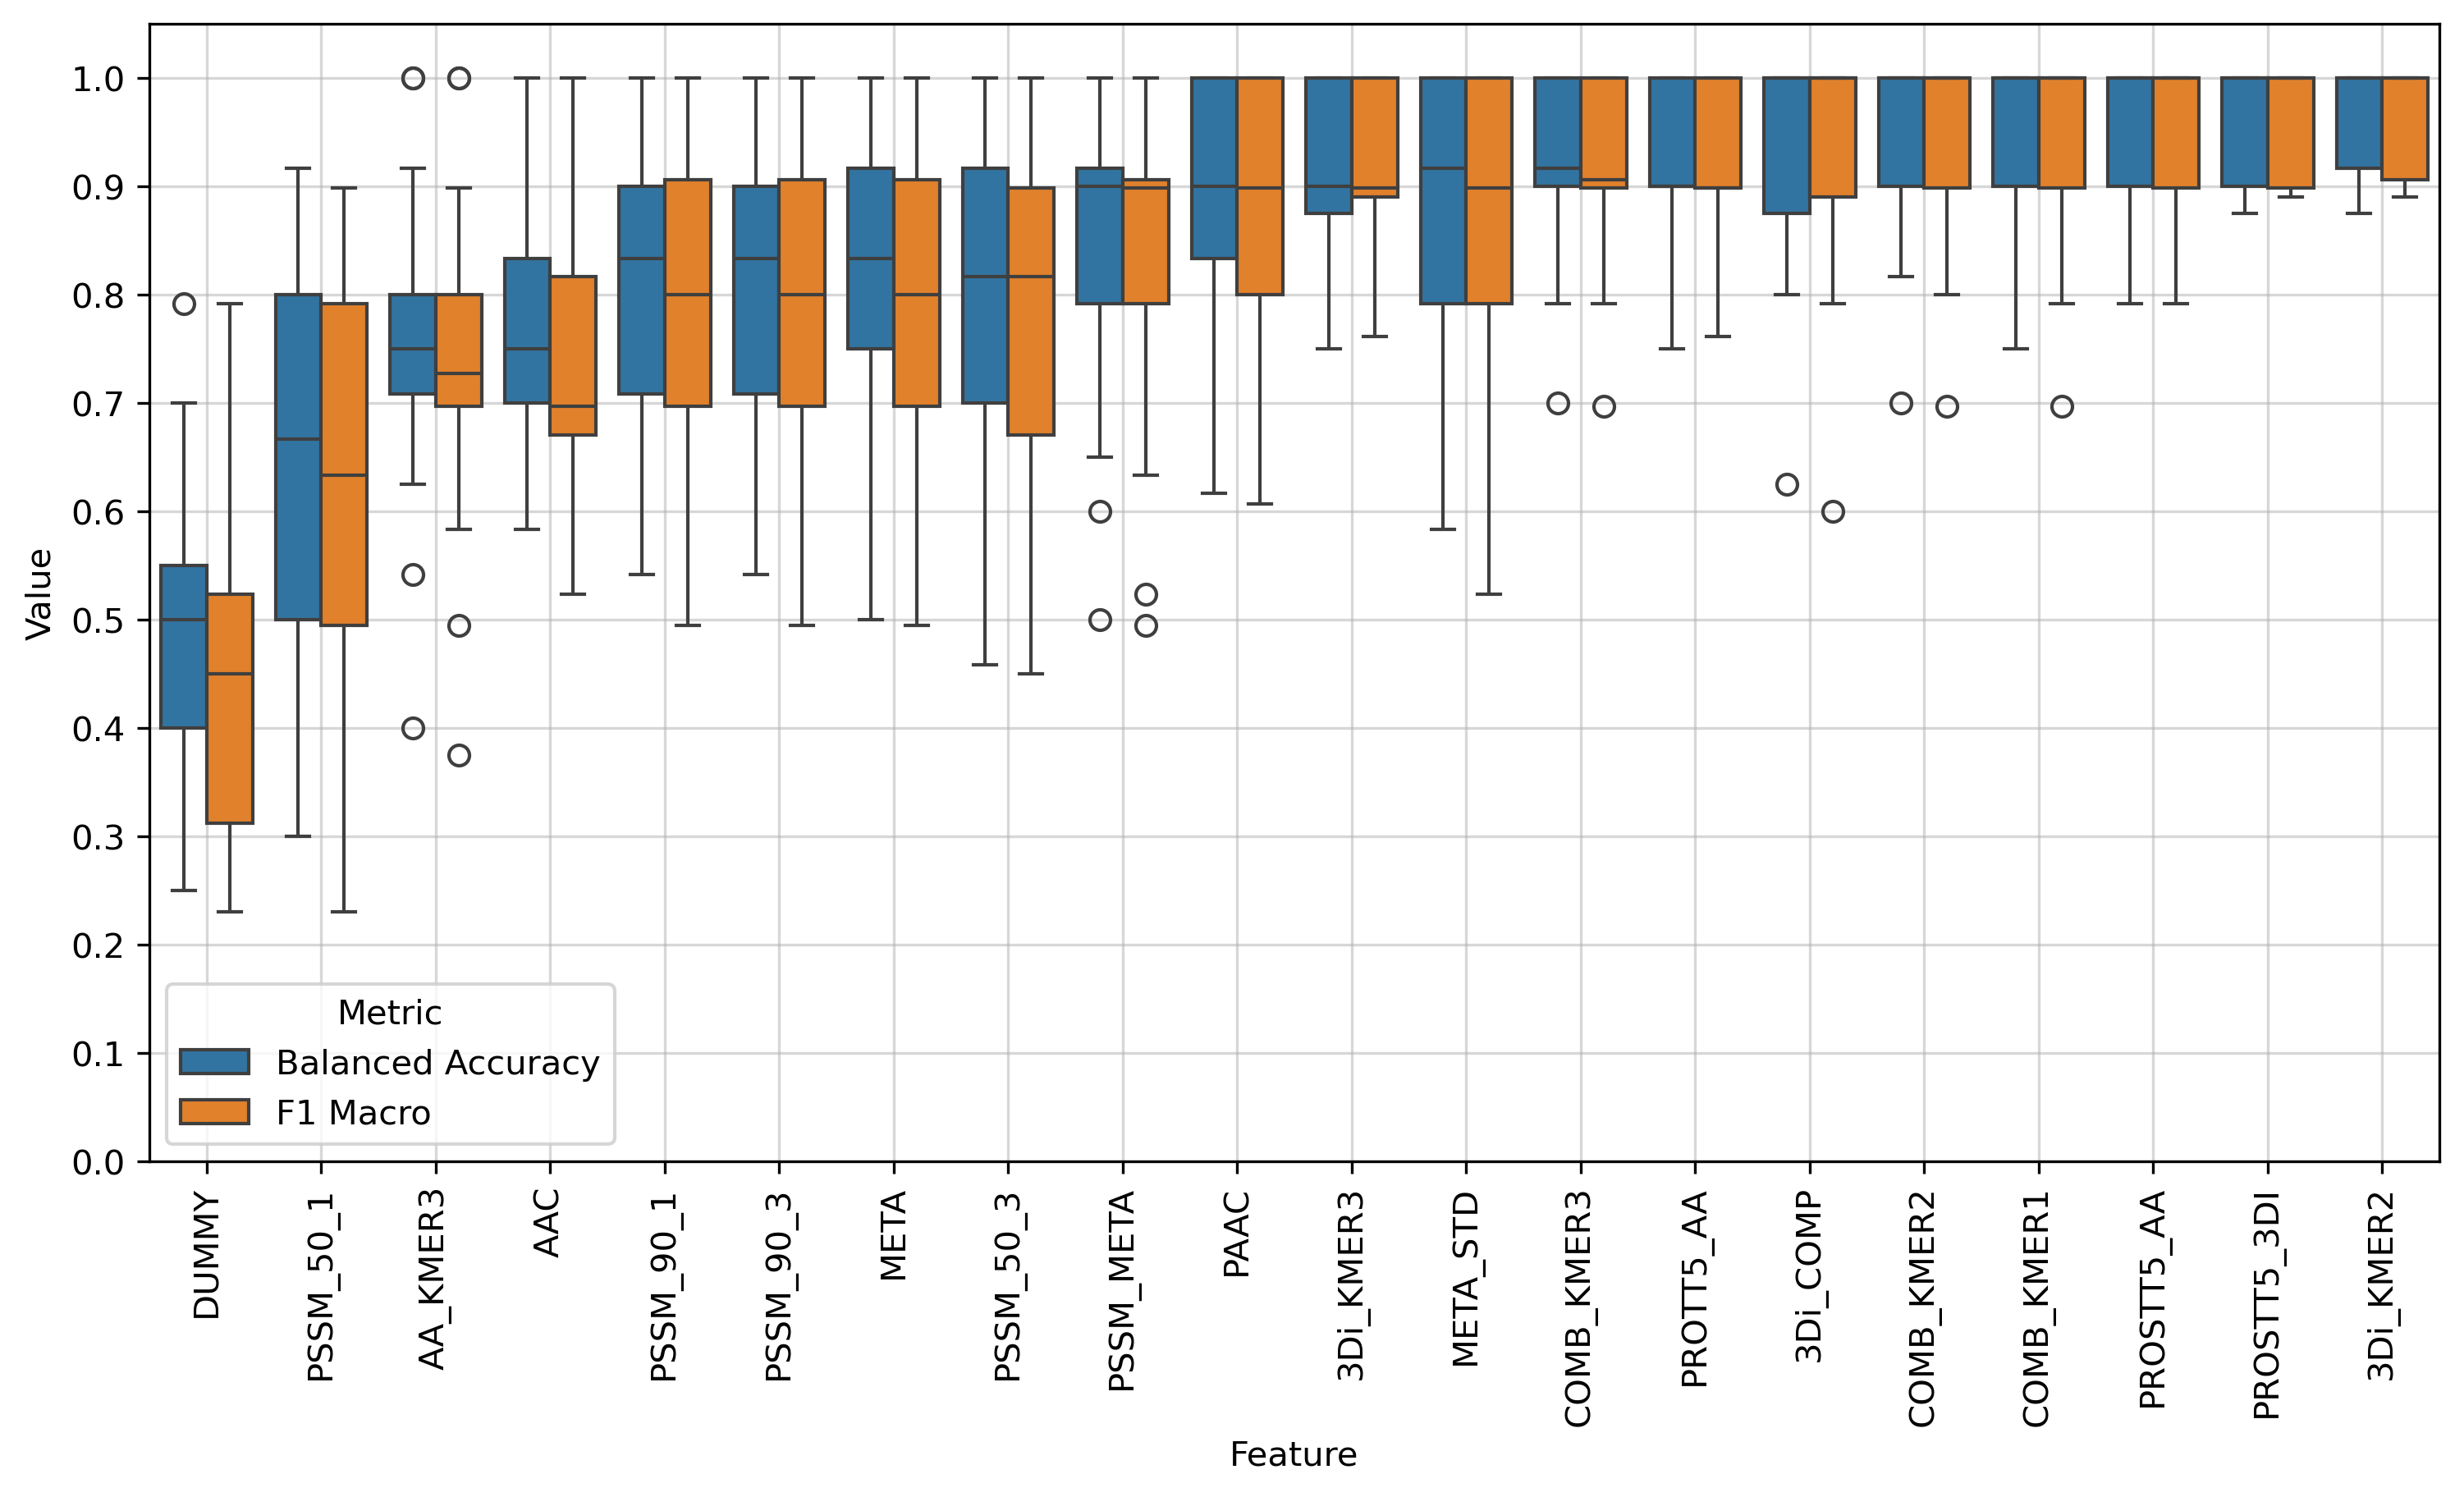

In [21]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include=["F1 Macro", "Balanced Accuracy"],
)

### Plots for paper

In [25]:
df_results_long_plots = df_results_long.copy()
df_results_long_plots["Feature"] =  df_results_long_plots["Feature"].replace("PSSM_META", "MULTI_PSSM")

In [29]:
df_results_long_plots.Feature.unique()

array(['DUMMY', 'AAC', 'PAAC', 'AA_KMER3', '3Di_COMP', '3Di_KMER2',
       '3Di_KMER3', 'COMB_KMER1', 'COMB_KMER2', 'COMB_KMER3', 'PROTT5_AA',
       'PROSTT5_AA', 'PROSTT5_3DI', 'PSSM_50_1', 'PSSM_50_3', 'PSSM_90_1',
       'PSSM_90_3', 'MULTI_PSSM', 'META', 'META_STD'], dtype=object)

In [30]:
feature_names = [
    "DUMMY",
    "AAC",
    "PAAC",
    "AA_KMER3",
    # "PSSM_META",
    "MULTI_PSSM",
    "META",
    "META_STD",
    # "COMB_KMER1",
    # "COMB_KMER2",
    # "COMB_KMER3",
    "PROTT5_AA",
    "PROSTT5_AA",
    "PROSTT5_3DI",
    "3Di_COMP",
    "3Di_KMER2",
    "3Di_KMER3",
    # "PSSM_50_1",
    # "PSSM_50_3",
    # "PSSM_90_1",
    # "PSSM_90_3",
]
df_results_long_plots_filtered = df_results_long_plots[df_results_long_plots.Feature.isin(feature_names)].copy()

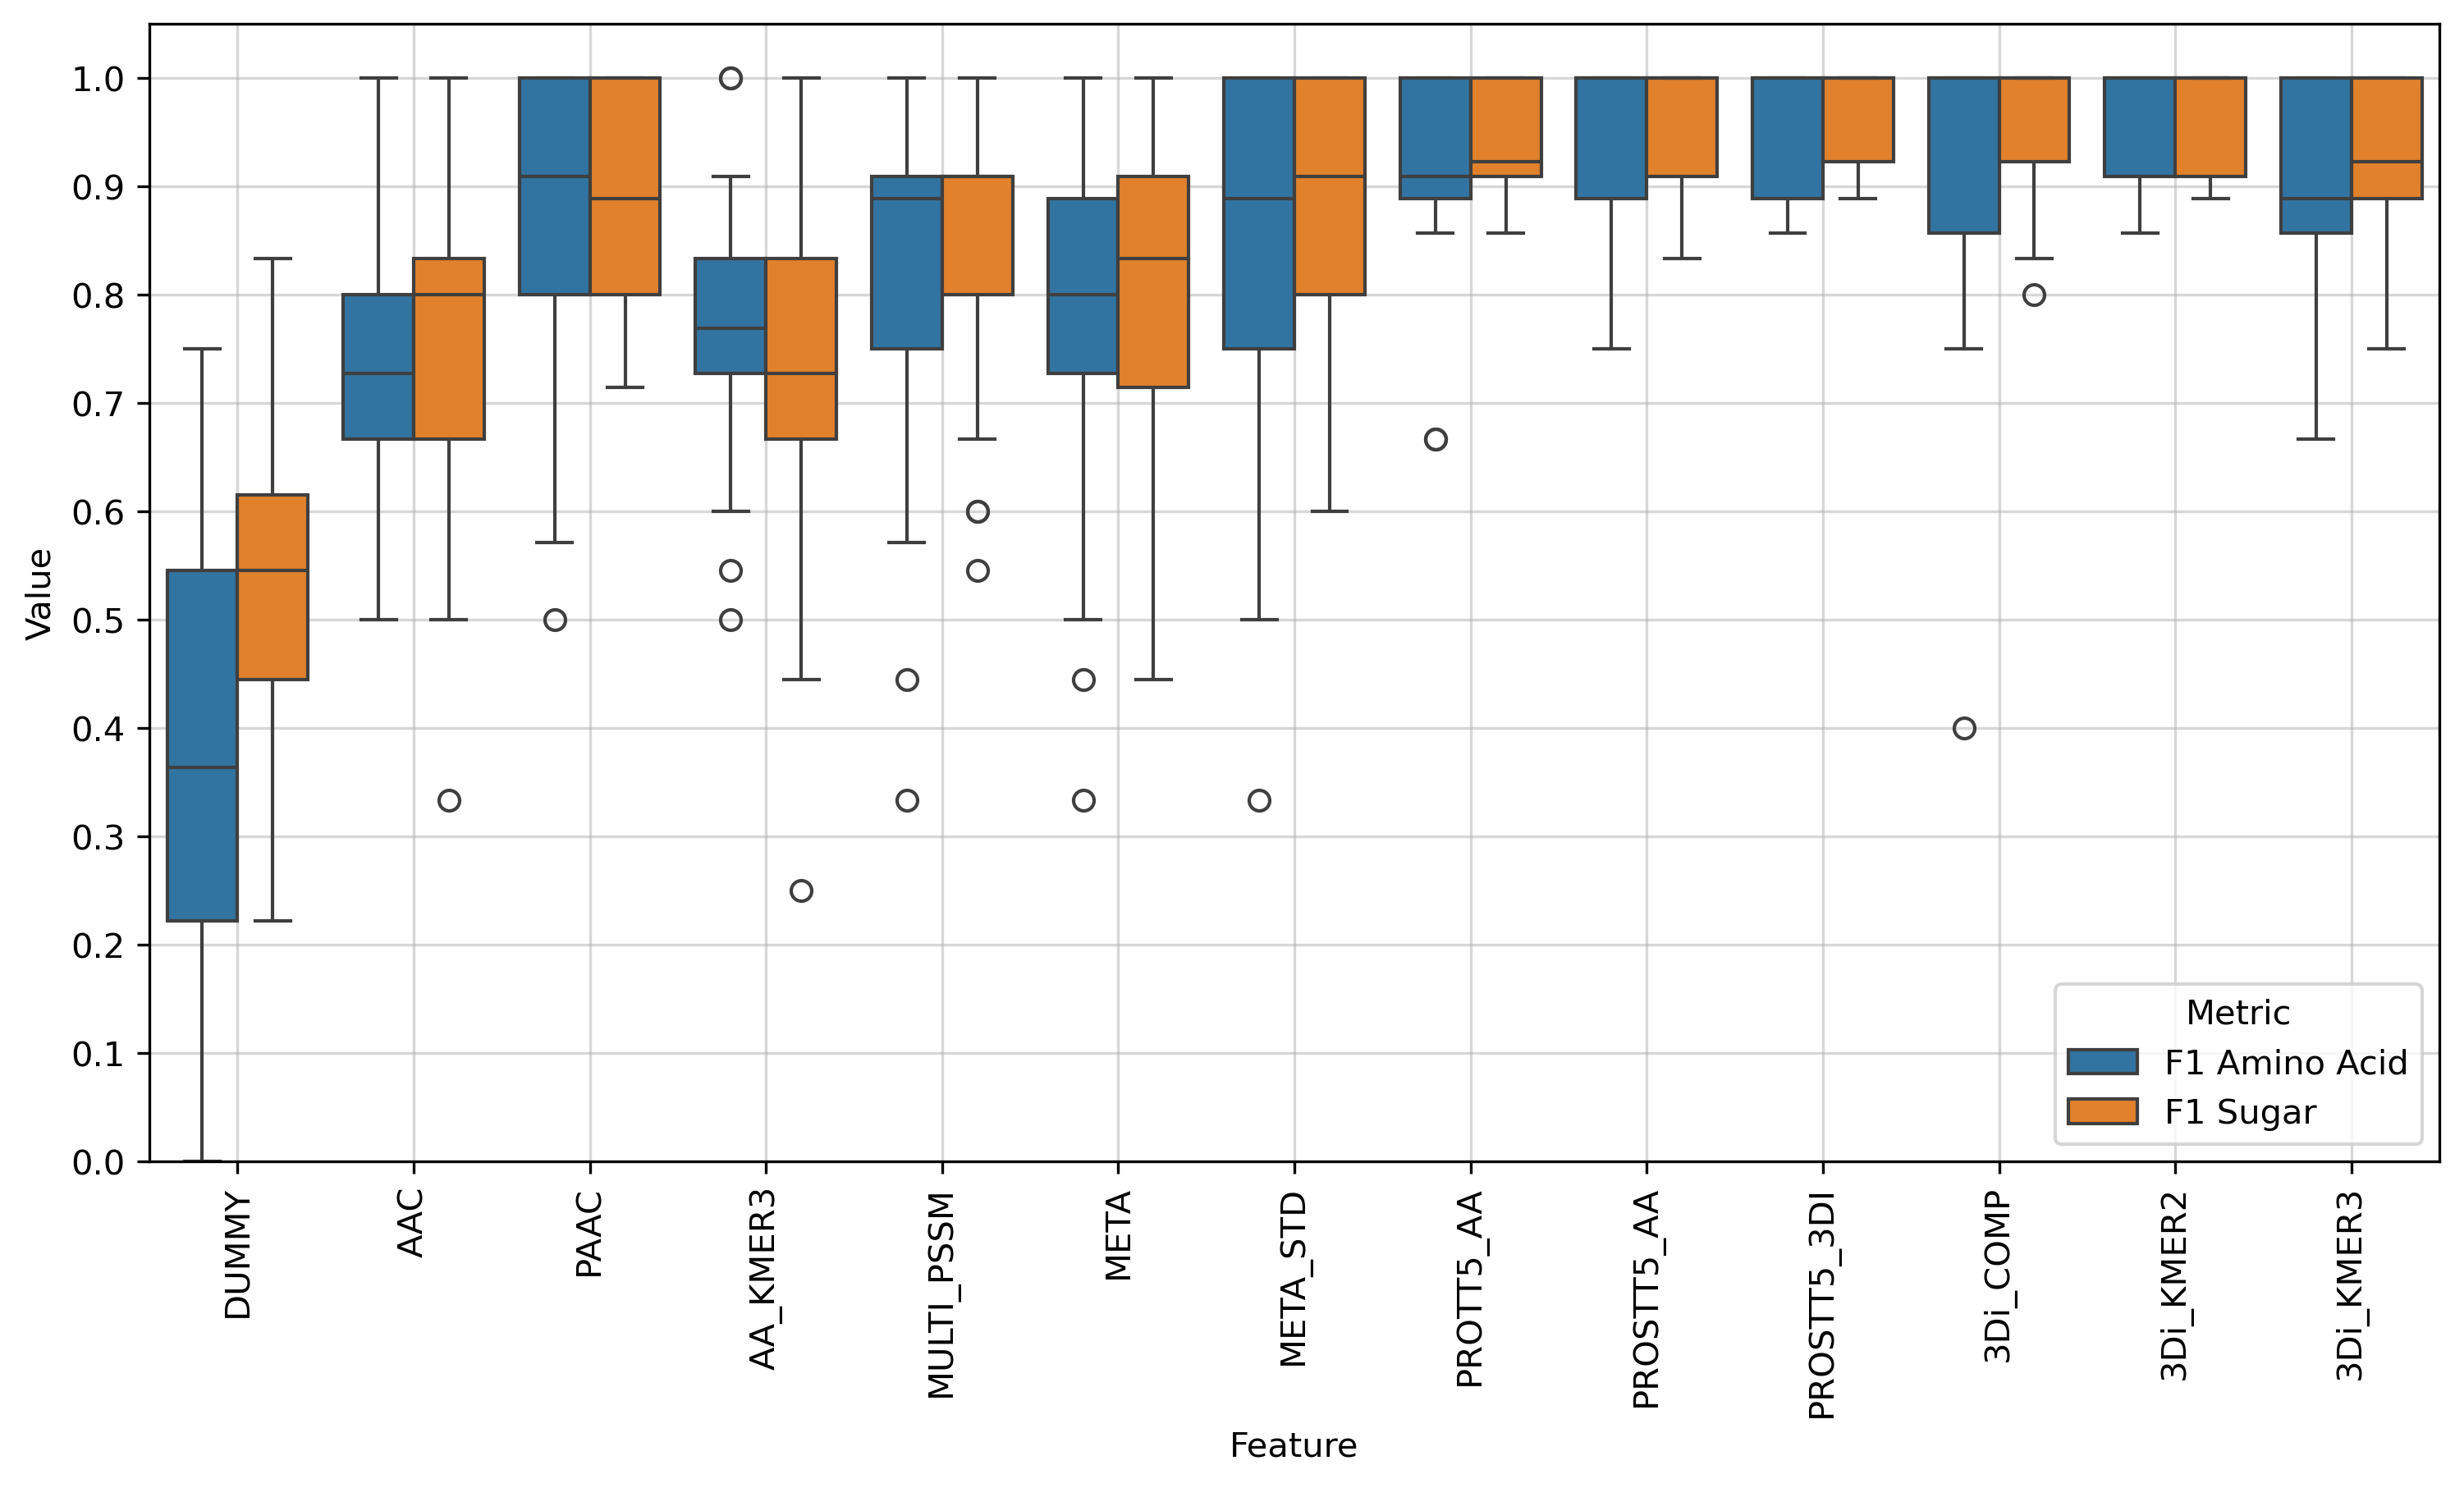

In [31]:
plot_results_long(
    df_results_long=df_results_long_plots_filtered,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME+"_filtered",
    metrics_include=["F1 Amino Acid", "F1 Sugar"],
    figsize=(12, 6),
    y_max=1.05,
    plot_order=feature_names,
    plot_type="box"
)